In [20]:
from google.colab import drive
drive.mount('/content/drive')
!pip install open3d

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import os
import json
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import glob
import open3d as o3d
import tensorflow as tf  # For tf.data
import keras
from keras import layers

import matplotlib.pyplot as plt

In [22]:
VAL_SPLIT = 0.2
NUM_SAMPLE_POINTS = 1024
BATCH_SIZE = 32
EPOCHS = 60
INITIAL_LR = 1e-3

In [23]:
import os
import glob
import open3d as o3d
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm  # for progress bar

# Define the directories
pcd_directory = './drive/MyDrive/seg'

# Collect all PCD file paths in the directory
pcd_file_paths = glob.glob(os.path.join(pcd_directory, '*.pcd'))

# Initialize lists to store point cloud data and labels
point_clouds = []
all_labels = []
point_cloud_labels = []

# Initialize OneHotEncoder with categories [0, 1] (0: undamaged, 1: damaged)
encoder = OneHotEncoder(sparse_output=False, categories=[[0, 1]])

# Assuming you have multiple PCD files in the directory
for file_path in tqdm(pcd_file_paths, desc="Processing PCD files"):
    print(f"Processing: {file_path}")

    # Step 1: Load the point cloud
    pcd = o3d.t.io.read_point_cloud(file_path)

    # Step 2: Extract the 3D positions and labels
    xyz = pcd.point.positions.numpy()
    labels = pcd.point.label.numpy().reshape(-1).astype(np.int8)

    # Step 3: Append the point cloud positions and labels
    point_clouds.append(xyz)
    all_labels.append(labels)

    # Step 4: One-hot encode the labels (0 or 1)
    one_hot_labels = encoder.fit_transform(labels.reshape(-1, 1))
    point_cloud_labels.append(one_hot_labels)

# At this point:
# - `point_clouds` contains all the point cloud data
# - `all_labels` contains all the original labels (0 and 1)
# - `point_cloud_labels` contains the one-hot encoded labels


Processing PCD files:   0%|          | 0/710 [00:00<?, ?it/s]

Processing: ./drive/MyDrive/seg/20230317075042.000-s2.pcd


Processing PCD files:   0%|          | 1/710 [00:01<18:56,  1.60s/it]

Processing: ./drive/MyDrive/seg/20230317075042.000-s0.pcd


Processing PCD files:   0%|          | 2/710 [00:02<11:34,  1.02it/s]

Processing: ./drive/MyDrive/seg/20230317075042.000-s3.pcd


Processing PCD files:   0%|          | 3/710 [00:02<09:26,  1.25it/s]

Processing: ./drive/MyDrive/seg/20230317075042.000-s1.pcd


Processing PCD files:   1%|          | 4/710 [00:03<08:08,  1.44it/s]

Processing: ./drive/MyDrive/seg/20230317075042.800-s2.pcd


Processing PCD files:   1%|          | 5/710 [00:03<07:34,  1.55it/s]

Processing: ./drive/MyDrive/seg/20230317075042.800-s0.pcd


Processing PCD files:   1%|          | 6/710 [00:04<07:08,  1.64it/s]

Processing: ./drive/MyDrive/seg/20230317075042.600-s6.pcd


Processing PCD files:   1%|          | 7/710 [00:04<06:53,  1.70it/s]

Processing: ./drive/MyDrive/seg/20230317075042.600-s8.pcd


Processing PCD files:   1%|          | 8/710 [00:05<06:43,  1.74it/s]

Processing: ./drive/MyDrive/seg/20230317075042.600-s7.pcd


Processing PCD files:   1%|▏         | 10/710 [00:35<1:18:41,  6.74s/it]

Processing: ./drive/MyDrive/seg/20230317075042.800-s1.pcd
Processing: ./drive/MyDrive/seg/20230317075042.600-s4.pcd
Processing: ./drive/MyDrive/seg/20230317075042.600-s5.pcd


Processing PCD files:   2%|▏         | 14/710 [00:35<25:31,  2.20s/it]

Processing: ./drive/MyDrive/seg/20230317075042.600-s3.pcd
Processing: ./drive/MyDrive/seg/20230317075042.600-s2.pcd
Processing: ./drive/MyDrive/seg/20230317075042.400-s8.pcd
Processing: ./drive/MyDrive/seg/20230317075042.600-s0.pcd

Processing PCD files:   3%|▎         | 18/710 [00:35<11:02,  1.04it/s]


Processing: ./drive/MyDrive/seg/20230317075042.600-s1.pcd
Processing: ./drive/MyDrive/seg/20230317075042.400-s7.pcd
Processing: ./drive/MyDrive/seg/20230317075042.400-s6.pcd


Processing PCD files:   3%|▎         | 20/710 [00:36<08:17,  1.39it/s]

Processing: ./drive/MyDrive/seg/20230317075042.400-s4.pcd
Processing: ./drive/MyDrive/seg/20230317075042.400-s5.pcd


Processing PCD files:   3%|▎         | 22/710 [00:36<06:00,  1.91it/s]

Processing: ./drive/MyDrive/seg/20230317075042.400-s3.pcd
Processing: ./drive/MyDrive/seg/20230317075042.400-s2.pcd


Processing PCD files:   3%|▎         | 24/710 [00:36<04:22,  2.62it/s]

Processing: ./drive/MyDrive/seg/20230317075042.400-s1.pcd
Processing: ./drive/MyDrive/seg/20230317075042.400-s0.pcd


Processing PCD files:   4%|▎         | 26/710 [00:37<03:00,  3.78it/s]

Processing: ./drive/MyDrive/seg/20230317075042.200-s8.pcd
Processing: ./drive/MyDrive/seg/20230317075042.200-s3.pcd


Processing PCD files:   4%|▍         | 28/710 [00:37<02:20,  4.86it/s]

Processing: ./drive/MyDrive/seg/20230317075042.200-s5.pcd
Processing: ./drive/MyDrive/seg/20230317075042.200-s4.pcd


Processing PCD files:   4%|▍         | 30/710 [00:37<01:55,  5.88it/s]

Processing: ./drive/MyDrive/seg/20230317075042.200-s6.pcd
Processing: ./drive/MyDrive/seg/20230317075042.200-s7.pcd
Processing: ./drive/MyDrive/seg/20230317075042.200-s2.pcd


Processing PCD files:   5%|▍         | 34/710 [00:37<01:12,  9.29it/s]

Processing: ./drive/MyDrive/seg/20230317075042.200-s1.pcd
Processing: ./drive/MyDrive/seg/20230317075042.200-s0.pcd
Processing: ./drive/MyDrive/seg/20230317075042.000-s8.pcd


Processing PCD files:   5%|▌         | 36/710 [00:38<01:05, 10.36it/s]

Processing: ./drive/MyDrive/seg/20230317075042.000-s7.pcd
Processing: ./drive/MyDrive/seg/20230317075042.000-s4.pcd
Processing: ./drive/MyDrive/seg/20230317075042.000-s6.pcd


Processing PCD files:   6%|▌         | 40/710 [00:38<00:57, 11.62it/s]

Processing: ./drive/MyDrive/seg/20230317075042.000-s5.pcd
Processing: ./drive/MyDrive/seg/20230321073817.400-s3.pcd
Processing: ./drive/MyDrive/seg/20230321073817.400-s0.pcd


Processing PCD files:   6%|▌         | 44/710 [00:38<00:53, 12.54it/s]

Processing: ./drive/MyDrive/seg/20230321073715.600-s9.pcd
Processing: ./drive/MyDrive/seg/20230321073715.600-s8.pcd
Processing: ./drive/MyDrive/seg/20230321073715.600-s7.pcd


Processing PCD files:   6%|▋         | 46/710 [00:38<00:46, 14.14it/s]

Processing: ./drive/MyDrive/seg/20230321073715.600-s6.pcd
Processing: ./drive/MyDrive/seg/20230321073715.600-s4.pcd
Processing: ./drive/MyDrive/seg/20230321073715.600-s3.pcd
Processing: ./drive/MyDrive/seg/20230321073715.600-s2.pcd


Processing PCD files:   7%|▋         | 50/710 [00:39<00:45, 14.39it/s]

Processing: ./drive/MyDrive/seg/20230321073715.600-s5.pcd
Processing: ./drive/MyDrive/seg/20230321073715.600-s12.pcd
Processing: ./drive/MyDrive/seg/20230321073715.600-s11.pcd
Processing: ./drive/MyDrive/seg/20230321073715.600-s10.pcd


Processing PCD files:   8%|▊         | 54/710 [00:39<00:43, 14.93it/s]

Processing: ./drive/MyDrive/seg/20230321073715.600-s1.pcd
Processing: ./drive/MyDrive/seg/20230321073715.200-s8.pcd
Processing: ./drive/MyDrive/seg/20230321073715.600-s0.pcd
Processing: ./drive/MyDrive/seg/20230321073715.200-s9.pcd


Processing PCD files:   8%|▊         | 58/710 [00:39<00:41, 15.74it/s]

Processing: ./drive/MyDrive/seg/20230321073715.200-s7.pcd
Processing: ./drive/MyDrive/seg/20230321073715.200-s4.pcd
Processing: ./drive/MyDrive/seg/20230321073715.200-s6.pcd
Processing: ./drive/MyDrive/seg/20230321073715.200-s5.pcd


Processing PCD files:   9%|▊         | 62/710 [00:39<00:48, 13.46it/s]

Processing: ./drive/MyDrive/seg/20230321073715.200-s3.pcd
Processing: ./drive/MyDrive/seg/20230321073715.200-s2.pcd
Processing: ./drive/MyDrive/seg/20230321073715.200-s11.pcd
Processing: ./drive/MyDrive/seg/20230321073715.200-s12.pcd

Processing PCD files:   9%|▉         | 66/710 [00:39<00:33, 19.06it/s]


Processing: ./drive/MyDrive/seg/20230321073715.200-s10.pcd
Processing: ./drive/MyDrive/seg/20230321073715.000-s9.pcd
Processing: ./drive/MyDrive/seg/20230321073715.000-s7.pcd
Processing: ./drive/MyDrive/seg/20230321073715.200-s0.pcd
Processing: ./drive/MyDrive/seg/20230321073715.000-s8.pcd
Processing: ./drive/MyDrive/seg/20230321073715.200-s1.pcd


Processing PCD files:  10%|█         | 74/710 [00:40<00:25, 24.93it/s]

Processing: ./drive/MyDrive/seg/20230321073715.000-s6.pcd
Processing: ./drive/MyDrive/seg/20230321073715.000-s5.pcd
Processing: ./drive/MyDrive/seg/20230321073715.000-s2.pcd
Processing: ./drive/MyDrive/seg/20230321073715.000-s3.pcd
Processing: ./drive/MyDrive/seg/20230321073715.000-s4.pcd
Processing: ./drive/MyDrive/seg/20230321073715.000-s12.pcd
Processing: ./drive/MyDrive/seg/20230321073715.000-s1.pcd
Processing: ./drive/MyDrive/seg/20230321073715.000-s10.pcd


Processing PCD files:  12%|█▏        | 82/710 [00:40<00:23, 27.20it/s]

Processing: ./drive/MyDrive/seg/20230321073715.000-s0.pcd
Processing: ./drive/MyDrive/seg/20230321073715.000-s11.pcd
Processing: ./drive/MyDrive/seg/20230317075731.600-s8.pcd
Processing: ./drive/MyDrive/seg/20230317075731.600-s7.pcd
Processing: ./drive/MyDrive/seg/20230317075731.600-s4.pcd


Processing PCD files:  12%|█▏        | 85/710 [00:40<00:24, 25.11it/s]

Processing: ./drive/MyDrive/seg/20230317075731.600-s2.pcd
Processing: ./drive/MyDrive/seg/20230317075731.600-s6.pcd
Processing: ./drive/MyDrive/seg/20230317075731.600-s3.pcd
Processing: ./drive/MyDrive/seg/20230317075731.600-s5.pcd
Processing: ./drive/MyDrive/seg/20230317075043.000-s8.pcd


Processing PCD files:  13%|█▎        | 91/710 [00:40<00:27, 22.80it/s]

Processing: ./drive/MyDrive/seg/20230317075043.000-s6.pcd
Processing: ./drive/MyDrive/seg/20230317075043.000-s7.pcd
Processing: ./drive/MyDrive/seg/20230317075043.000-s5.pcd
Processing: ./drive/MyDrive/seg/20230317075043.000-s4.pcd
Processing: ./drive/MyDrive/seg/20230317075043.000-s3.pcd


Processing PCD files:  14%|█▎        | 97/710 [00:41<00:25, 23.75it/s]

Processing: ./drive/MyDrive/seg/20230317075042.800-s8.pcd
Processing: ./drive/MyDrive/seg/20230317075043.000-s1.pcd
Processing: ./drive/MyDrive/seg/20230317075043.000-s0.pcd
Processing: ./drive/MyDrive/seg/20230317075043.000-s2.pcd
Processing: ./drive/MyDrive/seg/20230317075042.800-s7.pcd
Processing: ./drive/MyDrive/seg/20230317075042.800-s5.pcd


Processing PCD files:  14%|█▍        | 101/710 [00:41<00:23, 25.64it/s]

Processing: ./drive/MyDrive/seg/20230317075042.800-s6.pcd
Processing: ./drive/MyDrive/seg/20230317075042.800-s4.pcd
Processing: ./drive/MyDrive/seg/20230317075042.800-s3.pcd
Processing: ./drive/MyDrive/seg/20230321073849.600-s10.pcd
Processing: ./drive/MyDrive/seg/20230321073849.600-s1.pcd


Processing PCD files:  15%|█▌        | 107/710 [00:41<00:28, 21.40it/s]

Processing: ./drive/MyDrive/seg/20230321073849.200-s9.pcd
Processing: ./drive/MyDrive/seg/20230321073849.200-s8.pcd
Processing: ./drive/MyDrive/seg/20230321073849.200-s4.pcd
Processing: ./drive/MyDrive/seg/20230321073849.200-s6.pcd
Processing: ./drive/MyDrive/seg/20230321073849.200-s3.pcd
Processing: ./drive/MyDrive/seg/20230321073849.200-s5.pcd


Processing PCD files:  16%|█▌        | 114/710 [00:42<00:28, 21.21it/s]

Processing: ./drive/MyDrive/seg/20230321073849.200-s7.pcd
Processing: ./drive/MyDrive/seg/20230321073849.200-s2.pcd
Processing: ./drive/MyDrive/seg/20230321073849.200-s10.pcd
Processing: ./drive/MyDrive/seg/20230321073849.200-s1.pcd


Processing PCD files:  16%|█▋        | 117/710 [00:42<00:27, 21.92it/s]

Processing: ./drive/MyDrive/seg/20230321073842.600-s8.pcd
Processing: ./drive/MyDrive/seg/20230321073842.600-s7.pcd
Processing: ./drive/MyDrive/seg/20230321073842.600-s9.pcd
Processing: ./drive/MyDrive/seg/20230321073842.600-s5.pcd
Processing: ./drive/MyDrive/seg/20230321073842.600-s3.pcd
Processing: ./drive/MyDrive/seg/20230321073842.600-s4.pcd


Processing PCD files:  18%|█▊        | 127/710 [00:42<00:20, 27.95it/s]

Processing: ./drive/MyDrive/seg/20230321073842.600-s6.pcd
Processing: ./drive/MyDrive/seg/20230321073842.600-s2.pcd
Processing: ./drive/MyDrive/seg/20230321073842.600-s13.pcd
Processing: ./drive/MyDrive/seg/20230321073842.600-s12.pcd
Processing: ./drive/MyDrive/seg/20230321073842.600-s10.pcd
Processing: ./drive/MyDrive/seg/20230321073842.600-s11.pcd
Processing: ./drive/MyDrive/seg/20230321073842.600-s0.pcd
Processing: ./drive/MyDrive/seg/20230321073842.600-s1.pcd


Processing PCD files:  18%|█▊        | 130/710 [00:42<00:23, 24.74it/s]

Processing: ./drive/MyDrive/seg/20230321073842.400-s9.pcd
Processing: ./drive/MyDrive/seg/20230321073842.400-s7.pcd
Processing: ./drive/MyDrive/seg/20230321073842.400-s8.pcd
Processing: ./drive/MyDrive/seg/20230321073842.400-s6.pcd


Processing PCD files:  19%|█▉        | 136/710 [00:42<00:23, 24.52it/s]

Processing: ./drive/MyDrive/seg/20230321073842.400-s5.pcd
Processing: ./drive/MyDrive/seg/20230321073842.400-s4.pcd
Processing: ./drive/MyDrive/seg/20230321073842.400-s3.pcd
Processing: ./drive/MyDrive/seg/20230321073842.400-s12.pcd
Processing: ./drive/MyDrive/seg/20230321073842.400-s11.pcd
Processing: ./drive/MyDrive/seg/20230321073842.400-s13.pcd

Processing PCD files:  20%|█▉        | 140/710 [00:42<00:21, 26.75it/s]


Processing: ./drive/MyDrive/seg/20230321073842.400-s10.pcd
Processing: ./drive/MyDrive/seg/20230321073842.400-s2.pcd
Processing: ./drive/MyDrive/seg/20230321073842.400-s1.pcd
Processing: ./drive/MyDrive/seg/20230321073842.400-s0.pcd
Processing: ./drive/MyDrive/seg/20230321073842.200-s9.pcd


Processing PCD files:  21%|██        | 146/710 [00:43<00:21, 26.25it/s]

Processing: ./drive/MyDrive/seg/20230321073842.200-s8.pcd
Processing: ./drive/MyDrive/seg/20230321073842.200-s7.pcd
Processing: ./drive/MyDrive/seg/20230321073842.200-s5.pcd
Processing: ./drive/MyDrive/seg/20230321073842.200-s4.pcd
Processing: ./drive/MyDrive/seg/20230321073842.200-s2.pcd
Processing: ./drive/MyDrive/seg/20230321073842.200-s3.pcd


Processing PCD files:  22%|██▏       | 153/710 [00:43<00:20, 26.80it/s]

Processing: ./drive/MyDrive/seg/20230321073842.200-s6.pcd
Processing: ./drive/MyDrive/seg/20230321073842.200-s13.pcd
Processing: ./drive/MyDrive/seg/20230321073842.200-s12.pcd
Processing: ./drive/MyDrive/seg/20230321073842.200-s11.pcd
Processing: ./drive/MyDrive/seg/20230321073842.200-s10.pcd
Processing: ./drive/MyDrive/seg/20230321073842.000-s9.pcd


Processing PCD files:  22%|██▏       | 159/710 [00:43<00:22, 24.31it/s]

Processing: ./drive/MyDrive/seg/20230321073842.200-s0.pcd
Processing: ./drive/MyDrive/seg/20230321073842.200-s1.pcd
Processing: ./drive/MyDrive/seg/20230321073842.000-s6.pcd
Processing: ./drive/MyDrive/seg/20230321073842.000-s5.pcd
Processing: ./drive/MyDrive/seg/20230321073842.000-s7.pcd


Processing PCD files:  23%|██▎       | 162/710 [00:43<00:26, 20.84it/s]

Processing: ./drive/MyDrive/seg/20230321073842.000-s8.pcd
Processing: ./drive/MyDrive/seg/20230321073842.000-s4.pcd
Processing: ./drive/MyDrive/seg/20230321073842.000-s3.pcd
Processing: ./drive/MyDrive/seg/20230321073842.000-s2.pcd


Processing PCD files:  24%|██▍       | 169/710 [00:44<00:21, 25.66it/s]

Processing: ./drive/MyDrive/seg/20230321073842.000-s11.pcd
Processing: ./drive/MyDrive/seg/20230321073842.000-s12.pcd
Processing: ./drive/MyDrive/seg/20230321073842.000-s13.pcd
Processing: ./drive/MyDrive/seg/20230321073817.400-s9.pcd
Processing: ./drive/MyDrive/seg/20230321073842.000-s1.pcd
Processing: ./drive/MyDrive/seg/20230321073842.000-s0.pcd
Processing: ./drive/MyDrive/seg/20230321073842.000-s10.pcd


Processing PCD files:  25%|██▍       | 175/710 [00:44<00:20, 26.48it/s]

Processing: ./drive/MyDrive/seg/20230321073817.400-s8.pcd
Processing: ./drive/MyDrive/seg/20230321073817.400-s7.pcd
Processing: ./drive/MyDrive/seg/20230321073817.400-s6.pcd
Processing: ./drive/MyDrive/seg/20230321073817.400-s4.pcd
Processing: ./drive/MyDrive/seg/20230321073817.400-s5.pcd
Processing: ./drive/MyDrive/seg/20230321073817.400-s10.pcd


Processing PCD files:  25%|██▌       | 181/710 [00:44<00:20, 26.13it/s]

Processing: ./drive/MyDrive/seg/20230321073817.400-s1.pcd
Processing: ./drive/MyDrive/seg/20230321073817.400-s2.pcd
Processing: ./drive/MyDrive/seg/20230321073817.400-s11.pcd
Processing: ./drive/MyDrive/seg/20230408042025.400-s6.pcd
Processing: ./drive/MyDrive/seg/20230408042025.400-s13.pcd
Processing: ./drive/MyDrive/seg/20230408042025.400-s12.pcd


Processing PCD files:  26%|██▌       | 185/710 [00:44<00:20, 25.31it/s]

Processing: ./drive/MyDrive/seg/20230408042025.400-s4.pcd
Processing: ./drive/MyDrive/seg/20230408042025.400-s5.pcd
Processing: ./drive/MyDrive/seg/20230408032833.200-s9.pcd
Processing: ./drive/MyDrive/seg/20230408042025.400-s10.pcd


Processing PCD files:  27%|██▋       | 191/710 [00:45<00:22, 23.16it/s]

Processing: ./drive/MyDrive/seg/20230408032833.200-s7.pcd
Processing: ./drive/MyDrive/seg/20230408042025.400-s11.pcd
Processing: ./drive/MyDrive/seg/20230408032833.200-s8.pcd
Processing: ./drive/MyDrive/seg/20230408032833.200-s6.pcd
Processing: ./drive/MyDrive/seg/20230408032833.200-s5.pcd


Processing PCD files:  27%|██▋       | 194/710 [00:45<00:23, 22.28it/s]

Processing: ./drive/MyDrive/seg/20230408032833.200-s4.pcd
Processing: ./drive/MyDrive/seg/20230408032833.200-s3.pcd
Processing: ./drive/MyDrive/seg/20230408032833.200-s2.pcd
Processing: ./drive/MyDrive/seg/20230408032833.200-s11.pcd


Processing PCD files:  28%|██▊       | 201/710 [00:45<00:33, 15.41it/s]

Processing: ./drive/MyDrive/seg/20230408032833.200-s12.pcd
Processing: ./drive/MyDrive/seg/20230408032833.200-s13.pcd
Processing: ./drive/MyDrive/seg/20230408032833.200-s10.pcd
Processing: ./drive/MyDrive/seg/20230408032833.200-s1.pcd
Processing: ./drive/MyDrive/seg/20230408032833.200-s0.pcd
Processing: ./drive/MyDrive/seg/20230408032833.000-s9.pcd
Processing: ./drive/MyDrive/seg/20230408032833.000-s5.pcd


Processing PCD files:  29%|██▉       | 207/710 [00:46<00:27, 18.31it/s]

Processing: ./drive/MyDrive/seg/20230408032833.000-s4.pcd
Processing: ./drive/MyDrive/seg/20230408032833.000-s7.pcd
Processing: ./drive/MyDrive/seg/20230408032833.000-s6.pcd
Processing: ./drive/MyDrive/seg/20230408032833.000-s3.pcd
Processing: ./drive/MyDrive/seg/20230408032833.000-s8.pcd


Processing PCD files:  30%|███       | 215/710 [00:46<00:18, 26.65it/s]

Processing: ./drive/MyDrive/seg/20230408032833.000-s2.pcd
Processing: ./drive/MyDrive/seg/20230408032833.000-s13.pcd
Processing: ./drive/MyDrive/seg/20230408032833.000-s12.pcd
Processing: ./drive/MyDrive/seg/20230408032833.000-s11.pcd
Processing: ./drive/MyDrive/seg/20230408032832.800-s9.pcd
Processing: ./drive/MyDrive/seg/20230408032833.000-s0.pcd
Processing: ./drive/MyDrive/seg/20230408032833.000-s10.pcd
Processing: ./drive/MyDrive/seg/20230408032833.000-s1.pcd
Processing: ./drive/MyDrive/seg/20230408032832.800-s8.pcd


Processing PCD files:  31%|███▏      | 223/710 [00:46<00:17, 28.41it/s]

Processing: ./drive/MyDrive/seg/20230408032832.800-s6.pcd
Processing: ./drive/MyDrive/seg/20230408032832.800-s7.pcd
Processing: ./drive/MyDrive/seg/20230408032832.800-s5.pcd
Processing: ./drive/MyDrive/seg/20230408032832.800-s4.pcd
Processing: ./drive/MyDrive/seg/20230408032832.800-s10.pcd
Processing: ./drive/MyDrive/seg/20230408032832.800-s3.pcd


Processing PCD files:  32%|███▏      | 227/710 [00:46<00:16, 29.82it/s]

Processing: ./drive/MyDrive/seg/20230408032832.800-s11.pcd
Processing: ./drive/MyDrive/seg/20230408032832.800-s12.pcd
Processing: ./drive/MyDrive/seg/20230408032832.800-s2.pcd
Processing: ./drive/MyDrive/seg/20230408032832.800-s1.pcd
Processing: ./drive/MyDrive/seg/20230408032832.400-s8.pcd
Processing: ./drive/MyDrive/seg/20230408032832.400-s9.pcd
Processing: ./drive/MyDrive/seg/20230408032832.400-s7.pcd


Processing PCD files:  33%|███▎      | 234/710 [00:47<00:18, 25.71it/s]

Processing: ./drive/MyDrive/seg/20230408032832.400-s6.pcd
Processing: ./drive/MyDrive/seg/20230408032832.400-s5.pcd
Processing: ./drive/MyDrive/seg/20230408032832.400-s3.pcd
Processing: ./drive/MyDrive/seg/20230408032832.400-s4.pcd
Processing: ./drive/MyDrive/seg/20230408032832.400-s12.pcd


Processing PCD files:  34%|███▍      | 240/710 [00:47<00:17, 26.71it/s]

Processing: ./drive/MyDrive/seg/20230408032832.400-s11.pcd
Processing: ./drive/MyDrive/seg/20230408032832.400-s13.pcd
Processing: ./drive/MyDrive/seg/20230408032832.400-s2.pcd
Processing: ./drive/MyDrive/seg/20230408032832.400-s10.pcd
Processing: ./drive/MyDrive/seg/20230408032832.400-s1.pcd
Processing: ./drive/MyDrive/seg/20230408032832.400-s0.pcd


Processing PCD files:  34%|███▍      | 243/710 [00:47<00:17, 26.30it/s]

Processing: ./drive/MyDrive/seg/20230408032832.200-s9.pcd
Processing: ./drive/MyDrive/seg/20230408032832.200-s5.pcd
Processing: ./drive/MyDrive/seg/20230408032832.200-s8.pcd
Processing: ./drive/MyDrive/seg/20230408032832.200-s7.pcd
Processing: ./drive/MyDrive/seg/20230408032832.200-s6.pcd


Processing PCD files:  35%|███▌      | 249/710 [00:47<00:20, 22.91it/s]

Processing: ./drive/MyDrive/seg/20230408032832.200-s3.pcd
Processing: ./drive/MyDrive/seg/20230408032832.200-s4.pcd
Processing: ./drive/MyDrive/seg/20230408032832.200-s2.pcd
Processing: ./drive/MyDrive/seg/20230408032832.200-s13.pcd
Processing: ./drive/MyDrive/seg/20230408032832.200-s12.pcd
Processing: ./drive/MyDrive/seg/20230408032832.200-s11.pcd
Processing: ./drive/MyDrive/seg/20230408032832.200-s1.pcd


Processing PCD files:  36%|███▌      | 256/710 [00:47<00:17, 25.74it/s]

Processing: ./drive/MyDrive/seg/20230408032832.200-s10.pcd
Processing: ./drive/MyDrive/seg/20230321073850.000-s8.pcd
Processing: ./drive/MyDrive/seg/20230321073850.000-s7.pcd
Processing: ./drive/MyDrive/seg/20230321073850.000-s9.pcd
Processing: ./drive/MyDrive/seg/20230321073850.000-s6.pcd
Processing: ./drive/MyDrive/seg/20230408032832.200-s0.pcd
Processing: ./drive/MyDrive/seg/20230321073850.000-s5.pcd


Processing PCD files:  37%|███▋      | 264/710 [00:48<00:16, 27.00it/s]

Processing: ./drive/MyDrive/seg/20230321073850.000-s4.pcd
Processing: ./drive/MyDrive/seg/20230321073850.000-s3.pcd
Processing: ./drive/MyDrive/seg/20230321073850.000-s11.pcd
Processing: ./drive/MyDrive/seg/20230321073850.000-s10.pcd
Processing: ./drive/MyDrive/seg/20230321073850.000-s12.pcd
Processing: ./drive/MyDrive/seg/20230321073850.000-s2.pcd
Processing: ./drive/MyDrive/seg/20230321073850.000-s1.pcd


Processing PCD files:  38%|███▊      | 270/710 [00:48<00:20, 21.98it/s]

Processing: ./drive/MyDrive/seg/20230321073849.800-s7.pcd
Processing: ./drive/MyDrive/seg/20230321073849.800-s9.pcd
Processing: ./drive/MyDrive/seg/20230321073849.800-s8.pcd
Processing: ./drive/MyDrive/seg/20230321073849.800-s6.pcd


Processing PCD files:  38%|███▊      | 273/710 [00:48<00:20, 21.18it/s]

Processing: ./drive/MyDrive/seg/20230321073849.800-s4.pcd
Processing: ./drive/MyDrive/seg/20230321073849.800-s3.pcd
Processing: ./drive/MyDrive/seg/20230321073849.800-s5.pcd
Processing: ./drive/MyDrive/seg/20230321073849.800-s2.pcd


Processing PCD files:  40%|███▉      | 281/710 [00:48<00:16, 25.50it/s]

Processing: ./drive/MyDrive/seg/20230321073849.800-s10.pcd
Processing: ./drive/MyDrive/seg/20230321073849.800-s11.pcd
Processing: ./drive/MyDrive/seg/20230321073849.800-s12.pcd
Processing: ./drive/MyDrive/seg/20230321073849.800-s13.pcd
Processing: ./drive/MyDrive/seg/20230321073849.800-s1.pcd
Processing: ./drive/MyDrive/seg/20230321073849.600-s9.pcd
Processing: ./drive/MyDrive/seg/20230321073849.600-s8.pcd


Processing PCD files:  40%|████      | 287/710 [00:49<00:17, 24.74it/s]

Processing: ./drive/MyDrive/seg/20230321073849.600-s5.pcd
Processing: ./drive/MyDrive/seg/20230321073849.600-s6.pcd
Processing: ./drive/MyDrive/seg/20230321073849.600-s7.pcd
Processing: ./drive/MyDrive/seg/20230321073849.600-s2.pcd
Processing: ./drive/MyDrive/seg/20230321073849.600-s3.pcd


Processing PCD files:  41%|████▏     | 293/710 [00:49<00:13, 30.87it/s]

Processing: ./drive/MyDrive/seg/20230321073849.600-s4.pcd
Processing: ./drive/MyDrive/seg/20230321073849.600-s12.pcd
Processing: ./drive/MyDrive/seg/20230321073849.600-s11.pcd
Processing: ./drive/MyDrive/seg/20230408045118.400-s8.pcd
Processing: ./drive/MyDrive/seg/20230408045118.400-s7.pcd
Processing: ./drive/MyDrive/seg/20230408045118.400-s3.pcd
Processing: ./drive/MyDrive/seg/20230408045118.400-s12.pcd
Processing: ./drive/MyDrive/seg/20230408045118.400-s2.pcd
Processing: ./drive/MyDrive/seg/20230408045118.400-s4.pcd


Processing PCD files:  42%|████▏     | 301/710 [00:49<00:13, 31.31it/s]

Processing: ./drive/MyDrive/seg/20230408045118.400-s5.pcd
Processing: ./drive/MyDrive/seg/20230408045118.400-s6.pcd
Processing: ./drive/MyDrive/seg/20230408045118.400-s11.pcd
Processing: ./drive/MyDrive/seg/20230408045118.400-s10.pcd
Processing: ./drive/MyDrive/seg/20230408045118.400-s1.pcd
Processing: ./drive/MyDrive/seg/20230408044811.200-s9.pcd


Processing PCD files:  43%|████▎     | 305/710 [00:49<00:14, 27.27it/s]

Processing: ./drive/MyDrive/seg/20230408044811.200-s6.pcd
Processing: ./drive/MyDrive/seg/20230408044811.200-s3.pcd
Processing: ./drive/MyDrive/seg/20230408044811.200-s7.pcd
Processing: ./drive/MyDrive/seg/20230408044811.200-s4.pcd
Processing: ./drive/MyDrive/seg/20230408044811.200-s8.pcd


Processing PCD files:  43%|████▎     | 308/710 [00:49<00:16, 24.18it/s]

Processing: ./drive/MyDrive/seg/20230408044811.200-s5.pcd
Processing: ./drive/MyDrive/seg/20230408044811.200-s11.pcd
Processing: ./drive/MyDrive/seg/20230408044811.200-s2.pcd
Processing: ./drive/MyDrive/seg/20230408044811.200-s10.pcd


Processing PCD files:  44%|████▍     | 311/710 [00:50<00:18, 21.26it/s]

Processing: ./drive/MyDrive/seg/20230408044811.000-s6.pcd
Processing: ./drive/MyDrive/seg/20230408044811.000-s9.pcd
Processing: ./drive/MyDrive/seg/20230408044811.000-s7.pcd


Processing PCD files:  45%|████▍     | 316/710 [00:50<00:25, 15.21it/s]

Processing: ./drive/MyDrive/seg/20230408044811.000-s8.pcd
Processing: ./drive/MyDrive/seg/20230408044811.000-s3.pcd


Processing PCD files:  45%|████▍     | 318/710 [00:50<00:27, 14.44it/s]

Processing: ./drive/MyDrive/seg/20230408044811.000-s4.pcd
Processing: ./drive/MyDrive/seg/20230408044811.000-s5.pcd
Processing: ./drive/MyDrive/seg/20230408044811.000-s2.pcd


Processing PCD files:  45%|████▌     | 320/710 [00:50<00:28, 13.82it/s]

Processing: ./drive/MyDrive/seg/20230408044811.000-s11.pcd
Processing: ./drive/MyDrive/seg/20230408044811.000-s10.pcd
Processing: ./drive/MyDrive/seg/20230408044629.800-s9.pcd


Processing PCD files:  45%|████▌     | 322/710 [00:51<00:27, 13.93it/s]

Processing: ./drive/MyDrive/seg/20230408044629.800-s6.pcd
Processing: ./drive/MyDrive/seg/20230408044629.800-s8.pcd


Processing PCD files:  46%|████▌     | 326/710 [00:51<00:31, 12.05it/s]

Processing: ./drive/MyDrive/seg/20230408044629.800-s3.pcd
Processing: ./drive/MyDrive/seg/20230408044629.800-s7.pcd
Processing: ./drive/MyDrive/seg/20230408044629.800-s5.pcd


Processing PCD files:  46%|████▌     | 328/710 [00:51<00:31, 12.26it/s]

Processing: ./drive/MyDrive/seg/20230408044629.800-s4.pcd
Processing: ./drive/MyDrive/seg/20230408044629.800-s11.pcd
Processing: ./drive/MyDrive/seg/20230408044629.800-s2.pcd
Processing: ./drive/MyDrive/seg/20230408044629.800-s10.pcd
Processing: ./drive/MyDrive/seg/20230408044629.800-s1.pcd


Processing PCD files:  47%|████▋     | 334/710 [00:51<00:23, 16.34it/s]

Processing: ./drive/MyDrive/seg/20230408044629.600-s9.pcd
Processing: ./drive/MyDrive/seg/20230408044629.800-s0.pcd
Processing: ./drive/MyDrive/seg/20230408044629.600-s7.pcd
Processing: ./drive/MyDrive/seg/20230408044629.600-s5.pcd
Processing: ./drive/MyDrive/seg/20230408044629.600-s6.pcd


Processing PCD files:  48%|████▊     | 340/710 [00:52<00:19, 19.22it/s]

Processing: ./drive/MyDrive/seg/20230408044629.600-s8.pcd
Processing: ./drive/MyDrive/seg/20230408044629.600-s4.pcd
Processing: ./drive/MyDrive/seg/20230408044629.600-s3.pcd
Processing: ./drive/MyDrive/seg/20230408044629.600-s2.pcd
Processing: ./drive/MyDrive/seg/20230408044629.600-s11.pcd


Processing PCD files:  48%|████▊     | 344/710 [00:52<00:20, 17.64it/s]

Processing: ./drive/MyDrive/seg/20230408044629.400-s9.pcd
Processing: ./drive/MyDrive/seg/20230408044629.400-s6.pcd
Processing: ./drive/MyDrive/seg/20230408044629.600-s1.pcd
Processing: ./drive/MyDrive/seg/20230408044629.400-s8.pcd


Processing PCD files:  49%|████▉     | 348/710 [00:52<00:25, 14.06it/s]

Processing: ./drive/MyDrive/seg/20230408044629.600-s0.pcd
Processing: ./drive/MyDrive/seg/20230408044629.400-s7.pcd
Processing: ./drive/MyDrive/seg/20230408044629.600-s10.pcd


Processing PCD files:  49%|████▉     | 350/710 [00:53<00:30, 11.96it/s]

Processing: ./drive/MyDrive/seg/20230408044629.400-s5.pcd
Processing: ./drive/MyDrive/seg/20230408044629.400-s4.pcd


Processing PCD files:  50%|████▉     | 352/710 [00:53<00:31, 11.36it/s]

Processing: ./drive/MyDrive/seg/20230408044629.400-s3.pcd
Processing: ./drive/MyDrive/seg/20230408044629.400-s2.pcd
Processing: ./drive/MyDrive/seg/20230408044629.400-s12.pcd


Processing PCD files:  50%|█████     | 356/710 [00:53<00:28, 12.56it/s]

Processing: ./drive/MyDrive/seg/20230408044629.400-s10.pcd
Processing: ./drive/MyDrive/seg/20230408044629.400-s0.pcd
Processing: ./drive/MyDrive/seg/20230408042026.200-s9.pcd


Processing PCD files:  50%|█████     | 358/710 [00:53<00:29, 11.94it/s]

Processing: ./drive/MyDrive/seg/20230408044629.400-s1.pcd
Processing: ./drive/MyDrive/seg/20230408044629.400-s11.pcd
Processing: ./drive/MyDrive/seg/20230408042026.200-s8.pcd


Processing PCD files:  51%|█████     | 362/710 [00:54<00:32, 10.87it/s]

Processing: ./drive/MyDrive/seg/20230408042026.200-s7.pcd
Processing: ./drive/MyDrive/seg/20230408042026.200-s6.pcd
Processing: ./drive/MyDrive/seg/20230408042026.200-s4.pcd
Processing: ./drive/MyDrive/seg/20230408042026.200-s5.pcd


Processing PCD files:  52%|█████▏    | 366/710 [00:54<00:33, 10.33it/s]

Processing: ./drive/MyDrive/seg/20230408042026.200-s2.pcd
Processing: ./drive/MyDrive/seg/20230408042026.200-s10.pcd
Processing: ./drive/MyDrive/seg/20230408042026.200-s1.pcd


Processing PCD files:  52%|█████▏    | 370/710 [00:54<00:28, 11.80it/s]

Processing: ./drive/MyDrive/seg/20230408042026.000-s9.pcd
Processing: ./drive/MyDrive/seg/20230408042026.200-s3.pcd
Processing: ./drive/MyDrive/seg/20230408042026.000-s8.pcd
Processing: ./drive/MyDrive/seg/20230408042026.000-s7.pcd


Processing PCD files:  52%|█████▏    | 372/710 [00:54<00:28, 11.85it/s]

Processing: ./drive/MyDrive/seg/20230408042026.000-s6.pcd
Processing: ./drive/MyDrive/seg/20230408042026.000-s5.pcd
Processing: ./drive/MyDrive/seg/20230408042026.000-s4.pcd


Processing PCD files:  53%|█████▎    | 376/710 [00:55<00:29, 11.40it/s]

Processing: ./drive/MyDrive/seg/20230408042026.000-s1.pcd
Processing: ./drive/MyDrive/seg/20230408042025.800-s9.pcd
Processing: ./drive/MyDrive/seg/20230408042026.000-s10.pcd


Processing PCD files:  53%|█████▎    | 378/710 [00:55<00:29, 11.12it/s]

Processing: ./drive/MyDrive/seg/20230408042026.000-s2.pcd
Processing: ./drive/MyDrive/seg/20230408042026.000-s3.pcd


Processing PCD files:  54%|█████▎    | 380/710 [00:55<00:37,  8.87it/s]

Processing: ./drive/MyDrive/seg/20230408042025.800-s8.pcd
Processing: ./drive/MyDrive/seg/20230408042025.800-s7.pcd


Processing PCD files:  54%|█████▍    | 382/710 [00:56<00:39,  8.26it/s]

Processing: ./drive/MyDrive/seg/20230408042025.800-s6.pcd
Processing: ./drive/MyDrive/seg/20230408042025.800-s2.pcd


Processing PCD files:  54%|█████▍    | 384/710 [00:56<00:37,  8.62it/s]

Processing: ./drive/MyDrive/seg/20230408042025.800-s4.pcd
Processing: ./drive/MyDrive/seg/20230408042025.800-s3.pcd


Processing PCD files:  54%|█████▍    | 386/710 [00:56<00:37,  8.67it/s]

Processing: ./drive/MyDrive/seg/20230408042025.800-s5.pcd
Processing: ./drive/MyDrive/seg/20230408042025.600-s8.pcd


Processing PCD files:  55%|█████▍    | 388/710 [00:56<00:39,  8.07it/s]

Processing: ./drive/MyDrive/seg/20230408042025.600-s9.pcd
Processing: ./drive/MyDrive/seg/20230408042025.800-s1.pcd
Processing: ./drive/MyDrive/seg/20230408042025.600-s7.pcd


Processing PCD files:  55%|█████▌    | 391/710 [00:57<00:35,  9.01it/s]

Processing: ./drive/MyDrive/seg/20230408042025.600-s6.pcd
Processing: ./drive/MyDrive/seg/20230408042025.600-s5.pcd


Processing PCD files:  55%|█████▌    | 394/710 [00:57<00:28, 11.24it/s]

Processing: ./drive/MyDrive/seg/20230408042025.600-s12.pcd
Processing: ./drive/MyDrive/seg/20230408042025.600-s13.pcd
Processing: ./drive/MyDrive/seg/20230408042025.600-s4.pcd


Processing PCD files:  56%|█████▌    | 396/710 [00:57<00:30, 10.42it/s]

Processing: ./drive/MyDrive/seg/20230408042025.400-s9.pcd
Processing: ./drive/MyDrive/seg/20230408042025.400-s8.pcd
Processing: ./drive/MyDrive/seg/20230408042025.600-s10.pcd


Processing PCD files:  56%|█████▋    | 400/710 [00:57<00:27, 11.47it/s]

Processing: ./drive/MyDrive/seg/20230408042025.600-s11.pcd
Processing: ./drive/MyDrive/seg/20230408042025.400-s7.pcd
Processing: ./drive/MyDrive/seg/20230408045235.400-s8.pcd


Processing PCD files:  57%|█████▋    | 402/710 [00:58<00:26, 11.56it/s]

Processing: ./drive/MyDrive/seg/20230408045235.400-s7.pcd
Processing: ./drive/MyDrive/seg/20230408045235.400-s6.pcd
Processing: ./drive/MyDrive/seg/20230408045235.400-s5.pcd


Processing PCD files:  57%|█████▋    | 406/710 [00:58<00:23, 12.67it/s]

Processing: ./drive/MyDrive/seg/20230408045235.400-s3.pcd
Processing: ./drive/MyDrive/seg/20230408045235.400-s4.pcd
Processing: ./drive/MyDrive/seg/20230408045235.400-s11.pcd
Processing: ./drive/MyDrive/seg/20230408045235.400-s10.pcd


Processing PCD files:  58%|█████▊    | 409/710 [00:58<00:20, 14.92it/s]

Processing: ./drive/MyDrive/seg/20230408045235.400-s2.pcd
Processing: ./drive/MyDrive/seg/20230408045235.400-s1.pcd
Processing: ./drive/MyDrive/seg/20230408045235.400-s0.pcd


Processing PCD files:  58%|█████▊    | 415/710 [00:58<00:16, 18.43it/s]

Processing: ./drive/MyDrive/seg/20230408045235.200-s9.pcd
Processing: ./drive/MyDrive/seg/20230408045235.200-s8.pcd
Processing: ./drive/MyDrive/seg/20230408045235.200-s7.pcd
Processing: ./drive/MyDrive/seg/20230408045235.200-s4.pcd
Processing: ./drive/MyDrive/seg/20230408045235.200-s5.pcd
Processing: ./drive/MyDrive/seg/20230408045235.200-s10.pcd


Processing PCD files:  59%|█████▉    | 421/710 [00:59<00:14, 20.19it/s]

Processing: ./drive/MyDrive/seg/20230408045235.200-s3.pcd
Processing: ./drive/MyDrive/seg/20230408045235.200-s2.pcd
Processing: ./drive/MyDrive/seg/20230408045235.200-s6.pcd
Processing: ./drive/MyDrive/seg/20230408045235.200-s1.pcd
Processing: ./drive/MyDrive/seg/20230408045235.200-s0.pcd


Processing PCD files:  60%|██████    | 428/710 [00:59<00:11, 24.50it/s]

Processing: ./drive/MyDrive/seg/20230408045140.600-s9.pcd
Processing: ./drive/MyDrive/seg/20230408045140.600-s8.pcd
Processing: ./drive/MyDrive/seg/20230408045140.600-s6.pcd
Processing: ./drive/MyDrive/seg/20230408045140.600-s4.pcd
Processing: ./drive/MyDrive/seg/20230408045140.600-s3.pcd
Processing: ./drive/MyDrive/seg/20230408045140.600-s5.pcd


Processing PCD files:  61%|██████    | 432/710 [00:59<00:10, 27.65it/s]

Processing: ./drive/MyDrive/seg/20230408045140.600-s7.pcd
Processing: ./drive/MyDrive/seg/20230408045140.600-s11.pcd
Processing: ./drive/MyDrive/seg/20230408045140.600-s2.pcd
Processing: ./drive/MyDrive/seg/20230408045140.600-s10.pcd
Processing: ./drive/MyDrive/seg/20230408045140.600-s1.pcd
Processing: ./drive/MyDrive/seg/20230408045140.600-s0.pcd
Processing: ./drive/MyDrive/seg/20230408045140.400-s4.pcd
Processing: ./drive/MyDrive/seg/20230408045140.400-s5.pcd


Processing PCD files:  62%|██████▏   | 440/710 [00:59<00:09, 28.84it/s]

Processing: ./drive/MyDrive/seg/20230408045140.400-s8.pcd
Processing: ./drive/MyDrive/seg/20230408045140.400-s7.pcd
Processing: ./drive/MyDrive/seg/20230408045140.400-s6.pcd
Processing: ./drive/MyDrive/seg/20230408045140.400-s9.pcd
Processing: ./drive/MyDrive/seg/20230408045140.400-s3.pcd
Processing: ./drive/MyDrive/seg/20230408045140.400-s2.pcd


Processing PCD files:  63%|██████▎   | 448/710 [00:59<00:08, 30.81it/s]

Processing: ./drive/MyDrive/seg/20230408045140.400-s11.pcd
Processing: ./drive/MyDrive/seg/20230408045140.400-s1.pcd
Processing: ./drive/MyDrive/seg/20230408045140.400-s0.pcd
Processing: ./drive/MyDrive/seg/20230408045140.400-s10.pcd
Processing: ./drive/MyDrive/seg/20230408045140.200-s9.pcd
Processing: ./drive/MyDrive/seg/20230408045140.200-s7.pcd
Processing: ./drive/MyDrive/seg/20230408045140.200-s6.pcd
Processing: ./drive/MyDrive/seg/20230408045140.200-s8.pcd


Processing PCD files:  64%|██████▎   | 452/710 [01:00<00:08, 29.58it/s]

Processing: ./drive/MyDrive/seg/20230408045140.200-s5.pcd
Processing: ./drive/MyDrive/seg/20230408045140.200-s4.pcd
Processing: ./drive/MyDrive/seg/20230408045140.200-s3.pcd
Processing: ./drive/MyDrive/seg/20230408045140.200-s11.pcd
Processing: ./drive/MyDrive/seg/20230408045140.200-s2.pcd


Processing PCD files:  65%|██████▍   | 458/710 [01:00<00:09, 26.83it/s]

Processing: ./drive/MyDrive/seg/20230408045140.200-s0.pcd
Processing: ./drive/MyDrive/seg/20230408045140.000-s8.pcd
Processing: ./drive/MyDrive/seg/20230408045140.200-s1.pcd
Processing: ./drive/MyDrive/seg/20230408045140.000-s9.pcd
Processing: ./drive/MyDrive/seg/20230408045140.200-s10.pcd
Processing: ./drive/MyDrive/seg/20230408045140.000-s7.pcd


Processing PCD files:  65%|██████▌   | 465/710 [01:00<00:09, 25.40it/s]

Processing: ./drive/MyDrive/seg/20230408045140.000-s6.pcd
Processing: ./drive/MyDrive/seg/20230408045140.000-s5.pcd
Processing: ./drive/MyDrive/seg/20230408045140.000-s1.pcd
Processing: ./drive/MyDrive/seg/20230408045140.000-s3.pcd
Processing: ./drive/MyDrive/seg/20230408045140.000-s2.pcd


Processing PCD files:  66%|██████▋   | 471/710 [01:00<00:09, 26.35it/s]

Processing: ./drive/MyDrive/seg/20230408045140.000-s10.pcd
Processing: ./drive/MyDrive/seg/20230408045140.000-s11.pcd
Processing: ./drive/MyDrive/seg/20230408045140.000-s12.pcd
Processing: ./drive/MyDrive/seg/20230408045140.000-s4.pcd
Processing: ./drive/MyDrive/seg/20230408045118.400-s9.pcd
Processing: ./drive/MyDrive/seg/20230409021706.200-s9.pcd


Processing PCD files:  67%|██████▋   | 474/710 [01:00<00:09, 26.05it/s]

Processing: ./drive/MyDrive/seg/20230409021706.200-s4.pcd
Processing: ./drive/MyDrive/seg/20230409021706.200-s3.pcd
Processing: ./drive/MyDrive/seg/20230409021706.200-s2.pcd
Processing: ./drive/MyDrive/seg/20230409021706.200-s10.pcd
Processing: ./drive/MyDrive/seg/20230409021706.000-s9.pcd
Processing: ./drive/MyDrive/seg/20230409021706.200-s1.pcd
Processing: ./drive/MyDrive/seg/20230409021706.000-s6.pcd
Processing: ./drive/MyDrive/seg/20230409021706.000-s7.pcd


Processing PCD files:  68%|██████▊   | 485/710 [01:01<00:06, 37.16it/s]

Processing: ./drive/MyDrive/seg/20230409021706.000-s5.pcd
Processing: ./drive/MyDrive/seg/20230409021706.000-s8.pcd
Processing: ./drive/MyDrive/seg/20230409021706.000-s4.pcd
Processing: ./drive/MyDrive/seg/20230409021706.000-s3.pcd
Processing: ./drive/MyDrive/seg/20230409021706.000-s2.pcd
Processing: ./drive/MyDrive/seg/20230409021705.600-s9.pcd
Processing: ./drive/MyDrive/seg/20230409021705.600-s8.pcd
Processing: ./drive/MyDrive/seg/20230409021706.000-s10.pcd
Processing: ./drive/MyDrive/seg/20230409021705.600-s7.pcd
Processing: ./drive/MyDrive/seg/20230409021705.600-s5.pcd
Processing: ./drive/MyDrive/seg/20230409021705.600-s4.pcd


Processing PCD files:  70%|██████▉   | 496/710 [01:01<00:05, 37.97it/s]

Processing: ./drive/MyDrive/seg/20230409021705.600-s6.pcd
Processing: ./drive/MyDrive/seg/20230409021705.600-s3.pcd
Processing: ./drive/MyDrive/seg/20230409021705.600-s2.pcd
Processing: ./drive/MyDrive/seg/20230409021705.600-s10.pcd
Processing: ./drive/MyDrive/seg/20230409021705.600-s11.pcd
Processing: ./drive/MyDrive/seg/20230409021705.400-s9.pcd
Processing: ./drive/MyDrive/seg/20230409021705.400-s7.pcd


Processing PCD files:  71%|███████   | 505/710 [01:01<00:05, 38.92it/s]

Processing: ./drive/MyDrive/seg/20230409021705.400-s8.pcd
Processing: ./drive/MyDrive/seg/20230409021705.600-s1.pcd
Processing: ./drive/MyDrive/seg/20230409021705.400-s4.pcd
Processing: ./drive/MyDrive/seg/20230409021705.400-s6.pcd
Processing: ./drive/MyDrive/seg/20230409021705.400-s5.pcd
Processing: ./drive/MyDrive/seg/20230409021705.400-s2.pcd
Processing: ./drive/MyDrive/seg/20230409021705.400-s11.pcd
Processing: ./drive/MyDrive/seg/20230409021705.400-s10.pcd
Processing: ./drive/MyDrive/seg/20230409015911.200-s6.pcd


Processing PCD files:  73%|███████▎  | 516/710 [01:01<00:04, 44.78it/s]

Processing: ./drive/MyDrive/seg/20230409015911.200-s9.pcd
Processing: ./drive/MyDrive/seg/20230409015911.200-s7.pcd
Processing: ./drive/MyDrive/seg/20230409015911.200-s8.pcd
Processing: ./drive/MyDrive/seg/20230409021705.400-s1.pcd
Processing: ./drive/MyDrive/seg/20230409015911.200-s5.pcd
Processing: ./drive/MyDrive/seg/20230409015911.200-s4.pcd
Processing: ./drive/MyDrive/seg/20230409015911.200-s3.pcd
Processing: ./drive/MyDrive/seg/20230409015911.200-s2.pcd
Processing: ./drive/MyDrive/seg/20230409015911.200-s0.pcd
Processing: ./drive/MyDrive/seg/20230409015911.200-s1.pcd


Processing PCD files:  73%|███████▎  | 521/710 [01:02<00:04, 44.13it/s]

Processing: ./drive/MyDrive/seg/20230409015911.200-s10.pcd
Processing: ./drive/MyDrive/seg/20230408045235.800-s7.pcd
Processing: ./drive/MyDrive/seg/20230408045235.800-s6.pcd
Processing: ./drive/MyDrive/seg/20230408045235.800-s8.pcd
Processing: ./drive/MyDrive/seg/20230408045235.800-s9.pcd
Processing: ./drive/MyDrive/seg/20230408045235.800-s5.pcd
Processing: ./drive/MyDrive/seg/20230408045235.800-s4.pcd
Processing: ./drive/MyDrive/seg/20230408045235.800-s3.pcd
Processing: ./drive/MyDrive/seg/20230408045235.800-s11.pcd


Processing PCD files:  75%|███████▍  | 532/710 [01:02<00:03, 44.55it/s]

Processing: ./drive/MyDrive/seg/20230408045235.800-s10.pcd
Processing: ./drive/MyDrive/seg/20230408045235.800-s1.pcd
Processing: ./drive/MyDrive/seg/20230408045235.800-s0.pcd
Processing: ./drive/MyDrive/seg/20230408045235.600-s9.pcd
Processing: ./drive/MyDrive/seg/20230408045235.800-s2.pcd
Processing: ./drive/MyDrive/seg/20230408045235.600-s8.pcd
Processing: ./drive/MyDrive/seg/20230408045235.600-s7.pcd
Processing: ./drive/MyDrive/seg/20230408045235.600-s6.pcd
Processing: ./drive/MyDrive/seg/20230408045235.600-s4.pcd
Processing: ./drive/MyDrive/seg/20230408045235.600-s5.pcd
Processing: ./drive/MyDrive/seg/20230408045235.600-s3.pcd


Processing PCD files:  76%|███████▋  | 542/710 [01:02<00:03, 45.61it/s]

Processing: ./drive/MyDrive/seg/20230408045235.600-s1.pcd
Processing: ./drive/MyDrive/seg/20230408045235.400-s9.pcd
Processing: ./drive/MyDrive/seg/20230408045235.600-s0.pcd
Processing: ./drive/MyDrive/seg/20230408045235.600-s10.pcd
Processing: ./drive/MyDrive/seg/20230408045235.600-s2.pcd
Processing: ./drive/MyDrive/seg/20230409021911.600-s5.pcd
Processing: ./drive/MyDrive/seg/20230409021911.600-s2.pcd


Processing PCD files:  77%|███████▋  | 547/710 [01:02<00:04, 36.49it/s]

Processing: ./drive/MyDrive/seg/20230409021911.600-s10.pcd
Processing: ./drive/MyDrive/seg/20230409021911.600-s1.pcd
Processing: ./drive/MyDrive/seg/20230409021911.600-s0.pcd
Processing: ./drive/MyDrive/seg/20230409021911.400-s4.pcd
Processing: ./drive/MyDrive/seg/20230409021911.400-s8.pcd
Processing: ./drive/MyDrive/seg/20230409021911.400-s9.pcd
Processing: ./drive/MyDrive/seg/20230409021911.400-s6.pcd
Processing: ./drive/MyDrive/seg/20230409021911.400-s7.pcd


Processing PCD files:  78%|███████▊  | 557/710 [01:02<00:03, 38.27it/s]

Processing: ./drive/MyDrive/seg/20230409021911.400-s3.pcd
Processing: ./drive/MyDrive/seg/20230409021911.400-s5.pcd
Processing: ./drive/MyDrive/seg/20230409021911.400-s2.pcd
Processing: ./drive/MyDrive/seg/20230409021911.400-s10.pcd
Processing: ./drive/MyDrive/seg/20230409021911.400-s1.pcd
Processing: ./drive/MyDrive/seg/20230409021911.200-s9.pcd
Processing: ./drive/MyDrive/seg/20230409021911.400-s0.pcd
Processing: ./drive/MyDrive/seg/20230409021911.200-s8.pcd


Processing PCD files:  80%|███████▉  | 565/710 [01:03<00:03, 37.27it/s]

Processing: ./drive/MyDrive/seg/20230409021911.200-s6.pcd
Processing: ./drive/MyDrive/seg/20230409021911.200-s7.pcd
Processing: ./drive/MyDrive/seg/20230409021911.200-s4.pcd
Processing: ./drive/MyDrive/seg/20230409021911.200-s5.pcd
Processing: ./drive/MyDrive/seg/20230409021911.200-s3.pcd
Processing: ./drive/MyDrive/seg/20230409021911.200-s2.pcd
Processing: ./drive/MyDrive/seg/20230409021911.200-s0.pcd
Processing: ./drive/MyDrive/seg/20230409021911.000-s8.pcd
Processing: ./drive/MyDrive/seg/20230409021911.200-s10.pcd


Processing PCD files:  81%|████████  | 576/710 [01:03<00:03, 42.99it/s]

Processing: ./drive/MyDrive/seg/20230409021911.000-s9.pcd
Processing: ./drive/MyDrive/seg/20230409021911.200-s1.pcd
Processing: ./drive/MyDrive/seg/20230409021911.000-s7.pcd
Processing: ./drive/MyDrive/seg/20230409021911.000-s4.pcd
Processing: ./drive/MyDrive/seg/20230409021911.000-s6.pcd
Processing: ./drive/MyDrive/seg/20230409021911.000-s5.pcd
Processing: ./drive/MyDrive/seg/20230409021911.000-s3.pcd
Processing: ./drive/MyDrive/seg/20230409021911.000-s2.pcd
Processing: ./drive/MyDrive/seg/20230409021911.000-s1.pcd
Processing: ./drive/MyDrive/seg/20230409021911.000-s0.pcd


Processing PCD files:  83%|████████▎ | 586/710 [01:03<00:03, 40.47it/s]

Processing: ./drive/MyDrive/seg/20230409021707.200-s7.pcd
Processing: ./drive/MyDrive/seg/20230409021707.200-s8.pcd
Processing: ./drive/MyDrive/seg/20230409021707.200-s5.pcd
Processing: ./drive/MyDrive/seg/20230409021707.200-s6.pcd
Processing: ./drive/MyDrive/seg/20230409021707.200-s9.pcd
Processing: ./drive/MyDrive/seg/20230409021707.200-s4.pcd
Processing: ./drive/MyDrive/seg/20230409021707.200-s3.pcd
Processing: ./drive/MyDrive/seg/20230409021707.200-s1.pcd


Processing PCD files:  84%|████████▍ | 596/710 [01:03<00:02, 42.04it/s]

Processing: ./drive/MyDrive/seg/20230409021707.200-s2.pcd
Processing: ./drive/MyDrive/seg/20230409021707.000-s7.pcd
Processing: ./drive/MyDrive/seg/20230409021707.000-s9.pcd
Processing: ./drive/MyDrive/seg/20230409021707.200-s0.pcd
Processing: ./drive/MyDrive/seg/20230409021707.000-s8.pcd
Processing: ./drive/MyDrive/seg/20230409021707.000-s3.pcd
Processing: ./drive/MyDrive/seg/20230409021707.000-s4.pcd
Processing: ./drive/MyDrive/seg/20230409021707.000-s5.pcd
Processing: ./drive/MyDrive/seg/20230409021707.000-s6.pcd


Processing PCD files:  85%|████████▍ | 601/710 [01:04<00:02, 42.74it/s]

Processing: ./drive/MyDrive/seg/20230409021707.000-s2.pcd
Processing: ./drive/MyDrive/seg/20230409021707.000-s0.pcd
Processing: ./drive/MyDrive/seg/20230409021707.000-s1.pcd
Processing: ./drive/MyDrive/seg/20230409021706.800-s9.pcd
Processing: ./drive/MyDrive/seg/20230409021706.800-s6.pcd
Processing: ./drive/MyDrive/seg/20230409021706.800-s7.pcd
Processing: ./drive/MyDrive/seg/20230409021706.800-s5.pcd
Processing: ./drive/MyDrive/seg/20230409021706.800-s8.pcd
Processing: ./drive/MyDrive/seg/20230409021706.800-s4.pcd


Processing PCD files:  86%|████████▌ | 610/710 [01:04<00:02, 35.38it/s]

Processing: ./drive/MyDrive/seg/20230409021706.800-s3.pcd
Processing: ./drive/MyDrive/seg/20230409021706.800-s2.pcd
Processing: ./drive/MyDrive/seg/20230409021706.800-s1.pcd
Processing: ./drive/MyDrive/seg/20230409021706.800-s10.pcd
Processing: ./drive/MyDrive/seg/20230409021706.200-s8.pcd
Processing: ./drive/MyDrive/seg/20230409021706.200-s5.pcd
Processing: ./drive/MyDrive/seg/20230409021706.200-s6.pcd


Processing PCD files:  86%|████████▋ | 614/710 [01:04<00:02, 32.03it/s]

Processing: ./drive/MyDrive/seg/20230409021706.200-s7.pcd
Processing: ./drive/MyDrive/seg/20230409021919.400-s10.pcd
Processing: ./drive/MyDrive/seg/20230409021919.400-s1.pcd
Processing: ./drive/MyDrive/seg/20230409021919.200-s9.pcd
Processing: ./drive/MyDrive/seg/20230409021919.200-s8.pcd
Processing: ./drive/MyDrive/seg/20230409021919.200-s7.pcd
Processing: ./drive/MyDrive/seg/20230409021919.400-s0.pcd


Processing PCD files:  88%|████████▊ | 623/710 [01:04<00:02, 30.76it/s]

Processing: ./drive/MyDrive/seg/20230409021919.200-s6.pcd
Processing: ./drive/MyDrive/seg/20230409021919.200-s4.pcd
Processing: ./drive/MyDrive/seg/20230409021919.200-s5.pcd
Processing: ./drive/MyDrive/seg/20230409021919.200-s3.pcd
Processing: ./drive/MyDrive/seg/20230409021919.200-s2.pcd
Processing: ./drive/MyDrive/seg/20230409021919.200-s11.pcd
Processing: ./drive/MyDrive/seg/20230409021919.200-s10.pcd
Processing: ./drive/MyDrive/seg/20230409021919.200-s1.pcd


Processing PCD files:  89%|████████▉ | 633/710 [01:04<00:02, 36.28it/s]

Processing: ./drive/MyDrive/seg/20230409021919.200-s0.pcd
Processing: ./drive/MyDrive/seg/20230409021919.000-s9.pcd
Processing: ./drive/MyDrive/seg/20230409021919.000-s8.pcd
Processing: ./drive/MyDrive/seg/20230409021919.000-s6.pcd
Processing: ./drive/MyDrive/seg/20230409021919.000-s7.pcd
Processing: ./drive/MyDrive/seg/20230409021919.000-s5.pcd
Processing: ./drive/MyDrive/seg/20230409021919.000-s4.pcd
Processing: ./drive/MyDrive/seg/20230409021919.000-s11.pcd


Processing PCD files:  90%|█████████ | 641/710 [01:05<00:02, 32.86it/s]

Processing: ./drive/MyDrive/seg/20230409021919.000-s10.pcd
Processing: ./drive/MyDrive/seg/20230409021919.000-s2.pcd
Processing: ./drive/MyDrive/seg/20230409021919.000-s3.pcd
Processing: ./drive/MyDrive/seg/20230409021919.000-s1.pcd
Processing: ./drive/MyDrive/seg/20230409021918.800-s8.pcd
Processing: ./drive/MyDrive/seg/20230409021918.800-s9.pcd
Processing: ./drive/MyDrive/seg/20230409021919.000-s0.pcd


Processing PCD files:  91%|█████████▏| 649/710 [01:05<00:01, 34.90it/s]

Processing: ./drive/MyDrive/seg/20230409021918.800-s7.pcd
Processing: ./drive/MyDrive/seg/20230409021918.800-s6.pcd
Processing: ./drive/MyDrive/seg/20230409021918.800-s5.pcd
Processing: ./drive/MyDrive/seg/20230409021918.800-s11.pcd
Processing: ./drive/MyDrive/seg/20230409021918.800-s10.pcd
Processing: ./drive/MyDrive/seg/20230409021918.800-s3.pcd
Processing: ./drive/MyDrive/seg/20230409021918.800-s1.pcd
Processing: ./drive/MyDrive/seg/20230409021918.800-s2.pcd


Processing PCD files:  93%|█████████▎| 660/710 [01:05<00:01, 41.79it/s]

Processing: ./drive/MyDrive/seg/20230409021918.800-s4.pcd
Processing: ./drive/MyDrive/seg/20230409021918.800-s0.pcd
Processing: ./drive/MyDrive/seg/20230409021912.400-s9.pcd
Processing: ./drive/MyDrive/seg/20230409021912.400-s8.pcd
Processing: ./drive/MyDrive/seg/20230409021912.400-s7.pcd
Processing: ./drive/MyDrive/seg/20230409021912.400-s6.pcd
Processing: ./drive/MyDrive/seg/20230409021912.400-s5.pcd
Processing: ./drive/MyDrive/seg/20230409021912.400-s0.pcd
Processing: ./drive/MyDrive/seg/20230409021912.400-s2.pcd
Processing: ./drive/MyDrive/seg/20230409021912.400-s3.pcd
Processing: ./drive/MyDrive/seg/20230409021912.400-s4.pcd


Processing PCD files:  94%|█████████▎| 665/710 [01:05<00:01, 43.34it/s]

Processing: ./drive/MyDrive/seg/20230409021912.400-s1.pcd
Processing: ./drive/MyDrive/seg/20230409021912.000-s9.pcd
Processing: ./drive/MyDrive/seg/20230409021912.000-s8.pcd
Processing: ./drive/MyDrive/seg/20230409021912.000-s4.pcd
Processing: ./drive/MyDrive/seg/20230409021912.000-s7.pcd
Processing: ./drive/MyDrive/seg/20230409021912.000-s5.pcd
Processing: ./drive/MyDrive/seg/20230409021912.000-s6.pcd
Processing: ./drive/MyDrive/seg/20230409021912.000-s3.pcd


Processing PCD files:  95%|█████████▌| 675/710 [01:06<00:00, 36.72it/s]

Processing: ./drive/MyDrive/seg/20230409021912.000-s1.pcd
Processing: ./drive/MyDrive/seg/20230409021912.000-s10.pcd
Processing: ./drive/MyDrive/seg/20230409021912.000-s2.pcd
Processing: ./drive/MyDrive/seg/20230409021912.000-s0.pcd
Processing: ./drive/MyDrive/seg/20230409021911.800-s9.pcd
Processing: ./drive/MyDrive/seg/20230409021911.800-s6.pcd
Processing: ./drive/MyDrive/seg/20230409021911.800-s8.pcd


Processing PCD files:  96%|█████████▌| 679/710 [01:06<00:00, 32.92it/s]

Processing: ./drive/MyDrive/seg/20230409021911.800-s7.pcd
Processing: ./drive/MyDrive/seg/20230409021911.800-s3.pcd
Processing: ./drive/MyDrive/seg/20230409021911.800-s5.pcd
Processing: ./drive/MyDrive/seg/20230409021911.800-s4.pcd
Processing: ./drive/MyDrive/seg/20230409021911.800-s10.pcd
Processing: ./drive/MyDrive/seg/20230409021911.800-s2.pcd


Processing PCD files:  97%|█████████▋| 687/710 [01:06<00:00, 34.41it/s]

Processing: ./drive/MyDrive/seg/20230409021911.800-s1.pcd
Processing: ./drive/MyDrive/seg/20230409021911.800-s0.pcd
Processing: ./drive/MyDrive/seg/20230409021911.600-s8.pcd
Processing: ./drive/MyDrive/seg/20230409021911.600-s6.pcd
Processing: ./drive/MyDrive/seg/20230409021911.600-s7.pcd
Processing: ./drive/MyDrive/seg/20230409021911.600-s9.pcd
Processing: ./drive/MyDrive/seg/20230409021911.600-s3.pcd
Processing: ./drive/MyDrive/seg/20230409021911.600-s4.pcd
Processing: ./drive/MyDrive/seg/20230409021919.400-s5.pcd


Processing PCD files:  98%|█████████▊| 698/710 [01:06<00:00, 41.54it/s]

Processing: ./drive/MyDrive/seg/20230409021919.600-s5.pcd
Processing: ./drive/MyDrive/seg/20230409021919.400-s8.pcd
Processing: ./drive/MyDrive/seg/20230409021919.600-s2.pcd
Processing: ./drive/MyDrive/seg/20230409021919.400-s6.pcd
Processing: ./drive/MyDrive/seg/20230409021919.600-s8.pcd
Processing: ./drive/MyDrive/seg/20230409021919.600-s0.pcd
Processing: ./drive/MyDrive/seg/20230409021919.400-s3.pcd
Processing: ./drive/MyDrive/seg/20230409021919.400-s2.pcd
Processing: ./drive/MyDrive/seg/20230409021919.400-s7.pcd
Processing: ./drive/MyDrive/seg/20230409021919.600-s9.pcd
Processing: ./drive/MyDrive/seg/20230409021919.400-s9.pcd


Processing PCD files: 100%|██████████| 710/710 [01:06<00:00, 10.60it/s]

Processing: ./drive/MyDrive/seg/20230409021919.600-s7.pcd
Processing: ./drive/MyDrive/seg/20230409021919.600-s4.pcd
Processing: ./drive/MyDrive/seg/20230409021919.400-s11.pcd
Processing: ./drive/MyDrive/seg/20230409021919.600-s1.pcd
Processing: ./drive/MyDrive/seg/20230409021919.600-s6.pcd
Processing: ./drive/MyDrive/seg/20230409021919.600-s3.pcd
Processing: ./drive/MyDrive/seg/20230409021919.400-s4.pcd
Processing: ./drive/MyDrive/seg/20230409021919.600-s10.pcd


In [24]:
for _ in range(5):
    i = random.randint(0, len(point_clouds) - 1)
    print(f"point_clouds[{i}].shape:", point_clouds[0].shape)
    print(f"point_cloud_labels[{i}].shape:", point_cloud_labels[0].shape)
    for j in range(5):
        print(
            f"all_labels[{i}][{j}]:",
            all_labels[i][j],
            f"\tpoint_cloud_labels[{i}][{j}]:",
            point_cloud_labels[i][j],
            "\n",
        )

point_clouds[469].shape: (10970, 3)
point_cloud_labels[469].shape: (10970, 2)
all_labels[469][0]: 0 	point_cloud_labels[469][0]: [1. 0.] 

all_labels[469][1]: 0 	point_cloud_labels[469][1]: [1. 0.] 

all_labels[469][2]: 0 	point_cloud_labels[469][2]: [1. 0.] 

all_labels[469][3]: 0 	point_cloud_labels[469][3]: [1. 0.] 

all_labels[469][4]: 0 	point_cloud_labels[469][4]: [1. 0.] 

point_clouds[428].shape: (10970, 3)
point_cloud_labels[428].shape: (10970, 2)
all_labels[428][0]: 0 	point_cloud_labels[428][0]: [1. 0.] 

all_labels[428][1]: 0 	point_cloud_labels[428][1]: [1. 0.] 

all_labels[428][2]: 0 	point_cloud_labels[428][2]: [1. 0.] 

all_labels[428][3]: 0 	point_cloud_labels[428][3]: [1. 0.] 

all_labels[428][4]: 0 	point_cloud_labels[428][4]: [1. 0.] 

point_clouds[106].shape: (10970, 3)
point_cloud_labels[106].shape: (10970, 2)
all_labels[106][0]: 0 	point_cloud_labels[106][0]: [1. 0.] 

all_labels[106][1]: 0 	point_cloud_labels[106][1]: [1. 0.] 

all_labels[106][2]: 0 	point_cloud

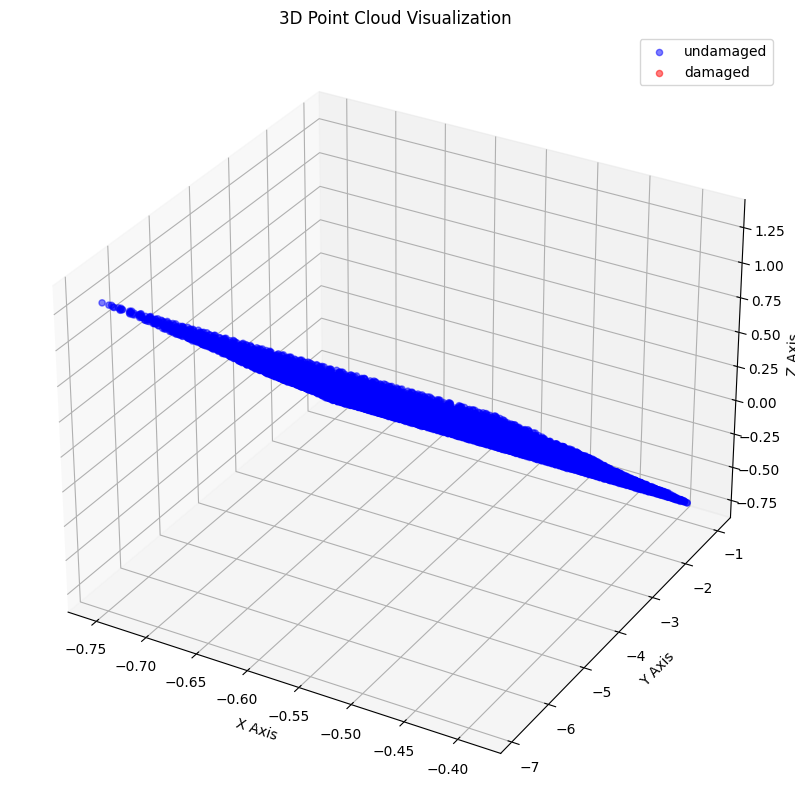

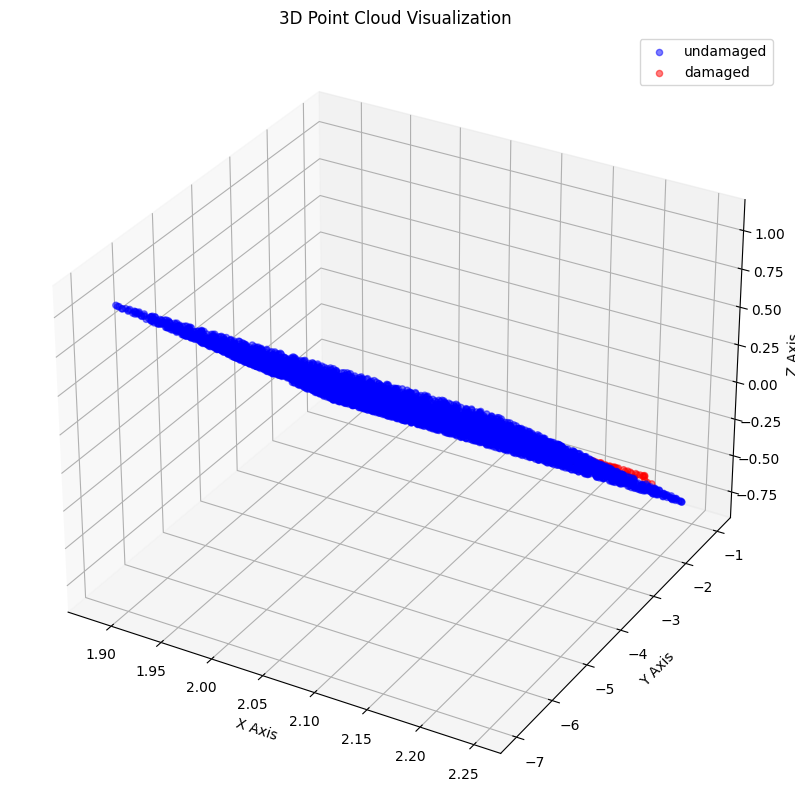

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming LABELS and COLORS are defined somewhere in your code
LABELS = ['undamaged', 'damaged']  # Example labels, modify as necessary
COLORS = ['blue', 'red']            # Corresponding colors for the labels

def visualize_data(point_cloud, labels):
    # Create a DataFrame for easier manipulation
    df = pd.DataFrame(
        data={
            "x": point_cloud[:, 0],
            "y": point_cloud[:, 1],
            "z": point_cloud[:, 2],
            "label": labels,
        }
    )

    # Initialize a 3D plot
    fig = plt.figure(figsize=(15, 10))
    ax = plt.axes(projection="3d")

    # Iterate through each label to plot the corresponding points
    for index, label in enumerate(LABELS):
        c_df = df[df["label"] == index]  # Use index for matching labels
        ax.scatter(
            c_df["x"], c_df["y"], c_df["z"],
            label=label, alpha=0.5, c=COLORS[index]
        )

    ax.legend()
    ax.set_title("3D Point Cloud Visualization")
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    plt.show()

# Visualize the point clouds and their labels
visualize_data(point_clouds[0], all_labels[0])  # Visualize the first point cloud
visualize_data(point_clouds[50], all_labels[50])  # Visualize the 301st point cloud


In [26]:
from tqdm import tqdm
import numpy as np
import random

for index in tqdm(range(len(point_clouds))):
    current_point_cloud = point_clouds[index]
    current_label_cloud = point_cloud_labels[index]
    current_labels = all_labels[index]
    num_points = len(current_point_cloud)

    # Check if the point cloud has enough points
    if num_points >= NUM_SAMPLE_POINTS:
        # Randomly sample indices if enough points are available
        sampled_indices = random.sample(list(range(num_points)), NUM_SAMPLE_POINTS)
    else:
        # If not enough points, pad indices by repeating existing points
        sampled_indices = list(range(num_points)) + random.choices(range(num_points), k=NUM_SAMPLE_POINTS - num_points)

    # Sample points and labels using sampled indices
    sampled_point_cloud = np.array([current_point_cloud[i] for i in sampled_indices])
    sampled_label_cloud = np.array([current_label_cloud[i] for i in sampled_indices])
    sampled_labels = np.array([current_labels[i] for i in sampled_indices])

    # Normalize the sampled point cloud
    norm_point_cloud = sampled_point_cloud - np.mean(sampled_point_cloud, axis=0)
    norm_point_cloud /= np.max(np.linalg.norm(norm_point_cloud, axis=1))

    # Update point clouds and labels
    point_clouds[index] = norm_point_cloud
    point_cloud_labels[index] = sampled_label_cloud
    all_labels[index] = sampled_labels


100%|██████████| 710/710 [00:08<00:00, 83.29it/s] 


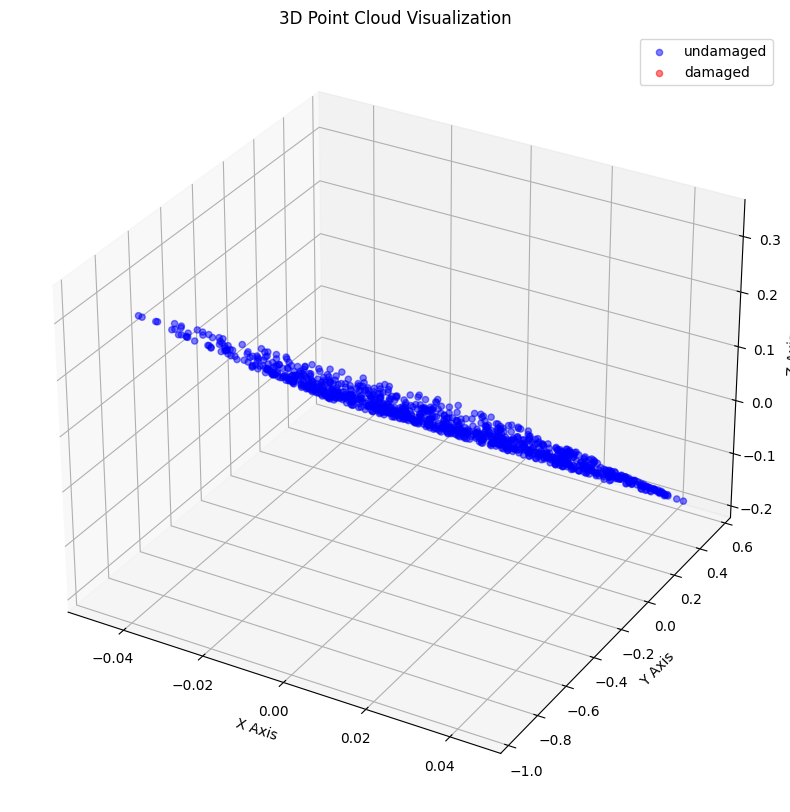

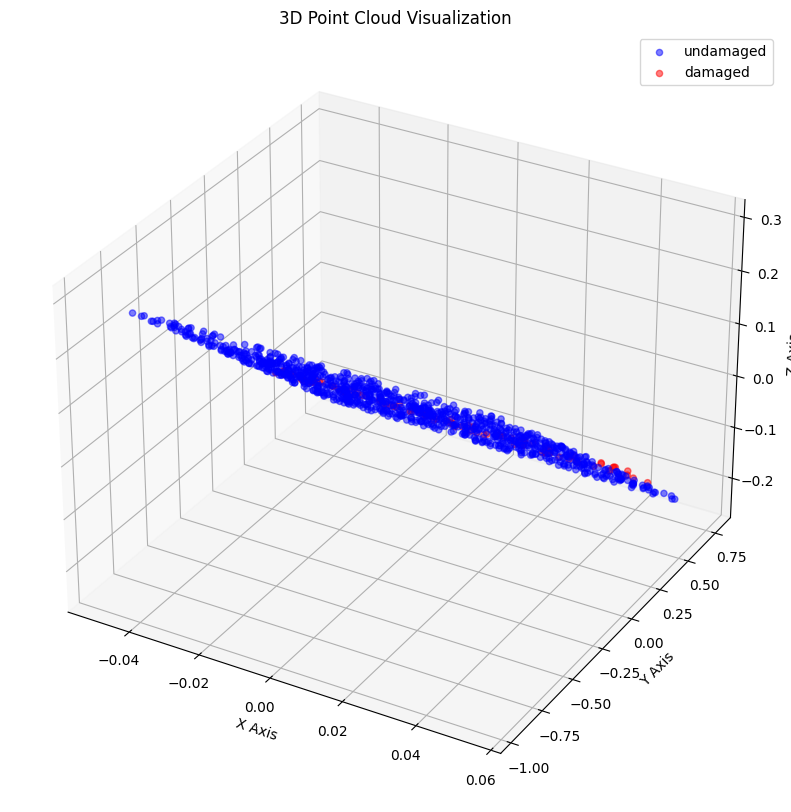

In [27]:
visualize_data(point_clouds[0], all_labels[0])
visualize_data(point_clouds[50], all_labels[50])

In [28]:
# Function to load data with correct shape setting
def load_data(point_cloud_batch, label_cloud_batch):
    point_cloud_batch.set_shape([NUM_SAMPLE_POINTS, 3])
    label_cloud_batch.set_shape([NUM_SAMPLE_POINTS, len(LABELS)])  # Removed +1
    return point_cloud_batch, label_cloud_batch

# Augment function with noise added to point cloud (not label cloud)
def augment(point_cloud_batch, label_cloud_batch):
    noise = tf.random.uniform(
        tf.shape(point_cloud_batch), -0.001, 0.001, dtype=tf.float32
    )
    point_cloud_batch += noise
    return point_cloud_batch, label_cloud_batch

# Function to generate the dataset
def generate_dataset(point_clouds, label_clouds, is_training=True):
    dataset = tf.data.Dataset.from_tensor_slices((point_clouds, label_clouds))
    dataset = dataset.shuffle(BATCH_SIZE * 100) if is_training else dataset
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size=BATCH_SIZE)
    if is_training:
        dataset = dataset.map(augment, num_parallel_calls=tf.data.AUTOTUNE)
    return dataset

# Splitting the data into training and validation sets
split_index = int(len(point_clouds) * (1 - VAL_SPLIT))
train_point_clouds = point_clouds[:split_index]
train_label_cloud = point_cloud_labels[:split_index]
total_training_examples = len(train_point_clouds)
val_point_clouds = point_clouds[split_index:]
val_label_cloud = point_cloud_labels[split_index:]

print("Num train point clouds:", len(train_point_clouds))
print("Num train point cloud labels:", len(train_label_cloud))
print("Num val point clouds:", len(val_point_clouds))
print("Num val point cloud labels:", len(val_label_cloud))

# Generating the training and validation datasets
train_dataset = generate_dataset(train_point_clouds, train_label_cloud)
val_dataset = generate_dataset(val_point_clouds, val_label_cloud, is_training=False)

print("Train Dataset:", train_dataset)
print("Validation Dataset:", val_dataset)

Num train point clouds: 568
Num train point cloud labels: 568
Num val point clouds: 142
Num val point cloud labels: 142
Train Dataset: <_ParallelMapDataset element_spec=(TensorSpec(shape=(None, 1024, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1024, 2), dtype=tf.float64, name=None))>
Validation Dataset: <_BatchDataset element_spec=(TensorSpec(shape=(None, 1024, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1024, 2), dtype=tf.float64, name=None))>


In [29]:
def conv_block(x, filters, name):
    x = layers.Conv1D(filters, kernel_size=1, padding="valid", name=f"{name}_conv")(x)
    x = layers.BatchNormalization(name=f"{name}_batch_norm")(x)
    return layers.Activation("relu", name=f"{name}_relu")(x)


def mlp_block(x, filters, name):
    x = layers.Dense(filters, name=f"{name}_dense")(x)
    x = layers.BatchNormalization(name=f"{name}_batch_norm")(x)
    return layers.Activation("relu", name=f"{name}_relu")(x)
class OrthogonalRegularizer(keras.regularizers.Regularizer):
    """Reference: https://keras.io/examples/vision/pointnet/#build-a-model"""

    def __init__(self, num_features, l2reg=0.001):
        self.num_features = num_features
        self.l2reg = l2reg
        self.identity = keras.ops.eye(num_features)

    def __call__(self, x):
        x = keras.ops.reshape(x, (-1, self.num_features, self.num_features))
        xxt = keras.ops.tensordot(x, x, axes=(2, 2))
        xxt = keras.ops.reshape(xxt, (-1, self.num_features, self.num_features))
        return keras.ops.sum(self.l2reg * keras.ops.square(xxt - self.identity))

    def get_config(self):
        config = super().get_config()
        config.update({"num_features": self.num_features, "l2reg_strength": self.l2reg})
        return config
def transformation_net(inputs, num_features, name):
    """
    Reference: https://keras.io/examples/vision/pointnet/#build-a-model.

    The `filters` values come from the original paper:
    https://arxiv.org/abs/1612.00593.
    """
    x = conv_block(inputs, filters=64, name=f"{name}_1")
    x = conv_block(x, filters=128, name=f"{name}_2")
    x = conv_block(x, filters=1024, name=f"{name}_3")
    x = layers.GlobalMaxPooling1D()(x)
    x = mlp_block(x, filters=512, name=f"{name}_1_1")
    x = mlp_block(x, filters=256, name=f"{name}_2_1")
    return layers.Dense(
        num_features * num_features,
        kernel_initializer="zeros",
        bias_initializer=keras.initializers.Constant(np.eye(num_features).flatten()),
        activity_regularizer=OrthogonalRegularizer(num_features),
        name=f"{name}_final",
    )(x)


def transformation_block(inputs, num_features, name):
    transformed_features = transformation_net(inputs, num_features, name=name)
    transformed_features = layers.Reshape((num_features, num_features))(
        transformed_features
    )
    return layers.Dot(axes=(2, 1), name=f"{name}_mm")([inputs, transformed_features])

In [30]:
def get_shape_segmentation_model(num_points, num_classes):
    input_points = keras.Input(shape=(None, 3))

    # PointNet Classification Network.
    transformed_inputs = transformation_block(
        input_points, num_features=3, name="input_transformation_block"
    )
    features_64 = conv_block(transformed_inputs, filters=64, name="features_64")
    features_128_1 = conv_block(features_64, filters=128, name="features_128_1")
    features_128_2 = conv_block(features_128_1, filters=128, name="features_128_2")
    transformed_features = transformation_block(
        features_128_2, num_features=128, name="transformed_features"
    )
    features_512 = conv_block(transformed_features, filters=512, name="features_512")
    features_2048 = conv_block(features_512, filters=2048, name="pre_maxpool_block")
    global_features = layers.MaxPool1D(pool_size=num_points, name="global_features")(
        features_2048
    )
    global_features = keras.ops.tile(global_features, [1, num_points, 1])

    # Segmentation head.
    segmentation_input = layers.Concatenate(name="segmentation_input")(
        [
            features_64,
            features_128_1,
            features_128_2,
            transformed_features,
            features_512,
            global_features,
        ]
    )
    segmentation_features = conv_block(
        segmentation_input, filters=128, name="segmentation_features"
    )
    outputs = layers.Conv1D(
        num_classes, kernel_size=1, activation="softmax", name="segmentation_head"
    )(segmentation_features)
    return keras.Model(input_points, outputs)

In [31]:
x, y = next(iter(train_dataset))

num_points = x.shape[1]
num_classes = y.shape[-1]

segmentation_model = get_shape_segmentation_model(num_points, num_classes)
segmentation_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, None, 3)        │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_transformation_blo… │ (None, None, 64)       │            256 │ input_layer_2[0][0]    │
│ (Conv1D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_transformation_blo… │ (None, None, 64)       │            256 │ input_transformation_… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_transformation_blo… │ (None, None, 64)       │              0 │ input_transformation_… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_transformation_blo… │ (None, None, 128)      │          8,320 │ input_transformation_… │
│ (Conv1D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_transformation_blo… │ (None, None, 128)      │            512 │ input_transformation_… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_transformation_blo… │ (None, None, 128)      │              0 │ input_transformation_… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_transformation_blo… │ (None, None, 1024)     │        132,096 │ input_transformation_… │
│ (Conv1D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_transformation_blo… │ (None, None, 1024)     │          4,096 │ input_transformation_… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_transformation_blo… │ (None, None, 1024)     │              0 │ input_transformation_… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_4    │ (None, 1024)           │              0 │ input_transformation_… │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_transformation_blo… │ (None, 512)            │        524,800 │ global_max_pooling1d_… │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_transformation_blo… │ (None, 512)            │          2,048 │ input_transformation_… │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 7,369,675 (28.11 MB)

 Trainable params: 7,355,723 (28.06 MB)

 Non-trainable params: 13,952 (54.50 KB)

Steps per epoch: 17.
Total training steps: 1020.


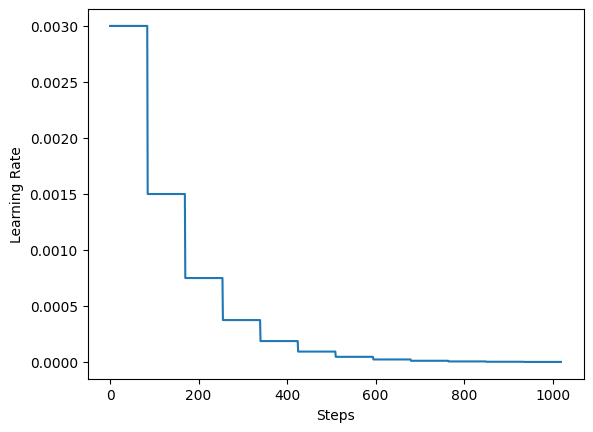

In [32]:
steps_per_epoch = total_training_examples // BATCH_SIZE
total_training_steps = steps_per_epoch * EPOCHS
print(f"Steps per epoch: {steps_per_epoch}.")
print(f"Total training steps: {total_training_steps}.")

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.003,
    decay_steps=steps_per_epoch * 5,
    decay_rate=0.5,
    staircase=True,
)

steps = range(total_training_steps)
lrs = [lr_schedule(step) for step in steps]

plt.plot(lrs)
plt.xlabel("Steps")
plt.ylabel("Learning Rate")
plt.show()

In [33]:
def run_experiment(epochs):
    segmentation_model = get_shape_segmentation_model(num_points, num_classes)
    segmentation_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=["accuracy"],
    )

    checkpoint_filepath = "checkpoint.weights.h5"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_loss",
        save_best_only=True,
        save_weights_only=True,
    )

    history = segmentation_model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=epochs,
        callbacks=[checkpoint_callback],
    )

    segmentation_model.load_weights(checkpoint_filepath)
    return segmentation_model, history


segmentation_model, history = run_experiment(epochs=20)

Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 359s 18s/step - accuracy: 0.7636 - loss: 19344.4492 - val_accuracy: 0.9381 - val_loss: 5861.6997
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 382s 19s/step - accuracy: 0.9180 - loss: 1066.3666 - val_accuracy: 0.9381 - val_loss: 265785.1562
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 385s 19s/step - accuracy: 0.9230 - loss: 361.3623 - val_accuracy: 0.9381 - val_loss: 672670.6875
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 394s 19s/step - accuracy: 0.9271 - loss: 252.5907 - val_accuracy: 0.9381 - val_loss: 1044178.3750
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 371s 19s/step - accuracy: 0.9195 - loss: 209.3620 - val_accuracy: 0.9381 - val_loss: 1486519.0000


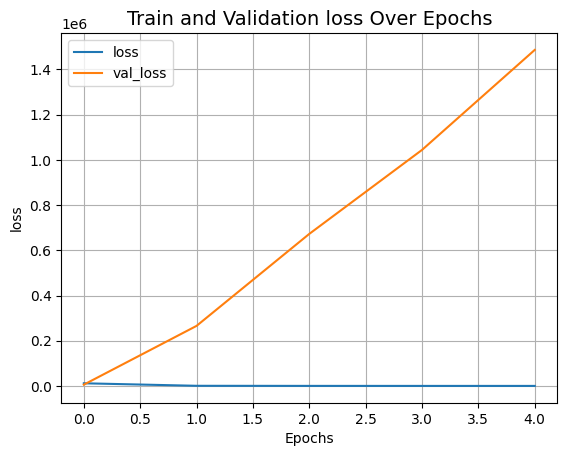

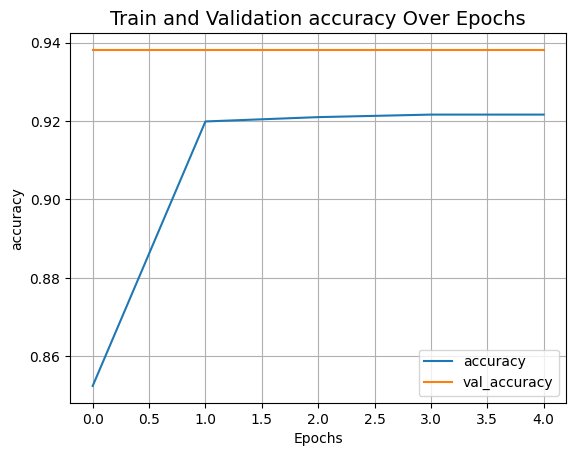

In [34]:
def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("accuracy")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Validation prediction shape: (32, 1024, 2)
Index selected: 14


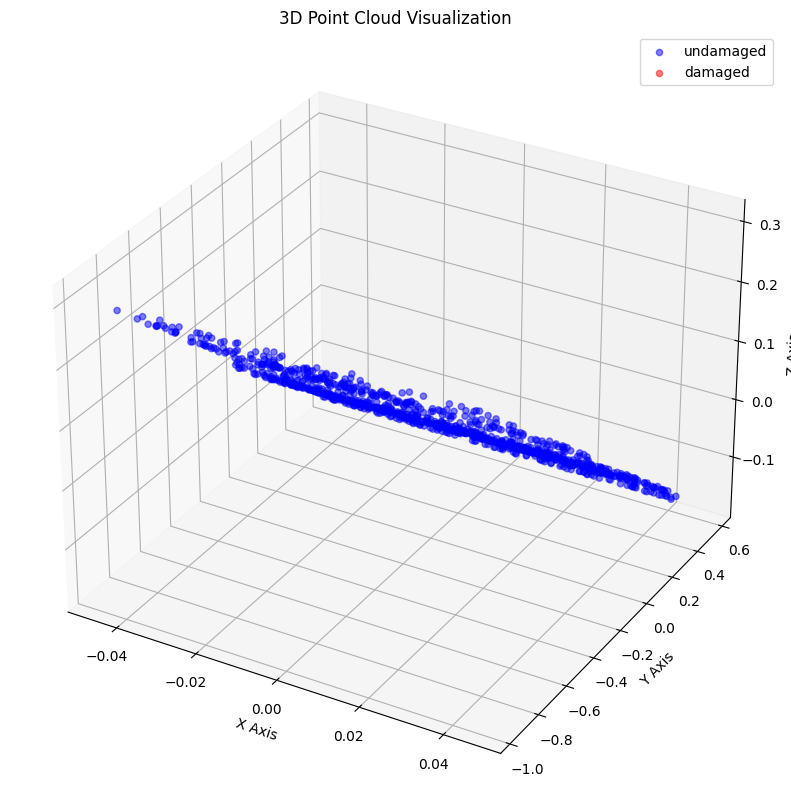

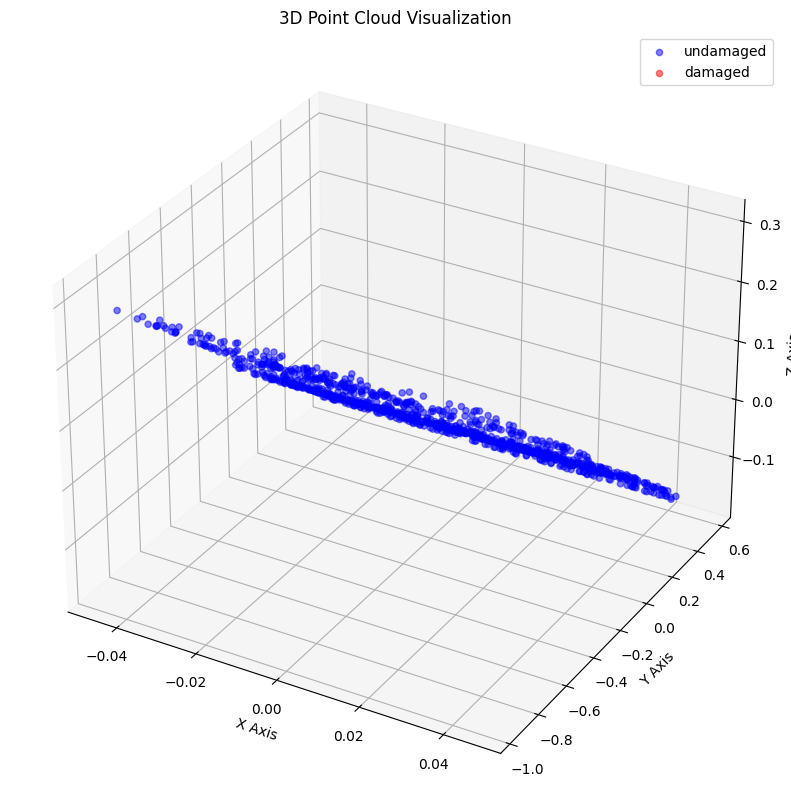

In [45]:
validation_batch = next(iter(val_dataset))
val_predictions = segmentation_model.predict(validation_batch[0])
print(f"Validation prediction shape: {val_predictions.shape}")


def visualize_single_point_cloud(point_clouds, label_clouds, idx):
    point_cloud = point_clouds[idx]
    label_cloud = label_clouds[idx]
    if label_cloud.shape[-1] > 1:
        labels = np.argmax(label_cloud, axis=-1)
    else:
        labels = label_cloud.astype(int)  # Convert to integer indices if not already

    visualize_data(point_cloud, labels)


idx = np.random.choice(len(validation_batch[0]))
print(f"Index selected: {idx}")
# Plotting with ground-truth.
visualize_single_point_cloud(validation_batch[0], validation_batch[1], idx)

# Plotting with predicted labels.
visualize_single_point_cloud(validation_batch[0], val_predictions, idx)